In [6]:
import folium
import main



Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i7-10700 CPU @ 2.90GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 864 rows, 63 columns and 3408 nonzeros
Model fingerprint: 0x1633e22e
Model has 294 quadratic constraints
Variable types: 10 continuous, 53 integer (53 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e-03, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]

MIP start from previous solve produced solution with objective 4 (0.01s)
Loaded MIP start from previous solve with objective 4


Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 4 

Optimal solution found (tolerance 1.00e-01)
Best objective 4.000000000000e+00, best bound 4.00

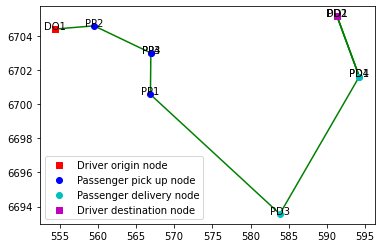

{0: [(0, 2), (2, 4), (4, 3), (3, 1), (1, 7), (7, 5), (5, 6), (6, 8), (8, 9)]}
{0: 60.403633501254205}


In [8]:
arcs, not_used= main.run_only_once()
m = folium.Map(location=[60.355, 5.21], zoom_start=12)


def get_coordinates():

    result = {}
    for driver in arcs:
        visitation_sequence=[]
        for arc in arcs[driver]:
            if arc[0] not in visitation_sequence:
                visitation_sequence.append(arc[0])
            if arc[1] not in visitation_sequence:
                visitation_sequence.append(arc[1])

        driver_origin = []
        driver_destination = []
        passenger_pickup = []
        passenger_delivery = []

    
        for node in visitation_sequence:
            
            driver_origin_nr = 1
            driver_destination_nr = 1

            if node in main.D:
                for d in main.drivers_json:
                    if main.drivers_json[d]['id'] == node:
                        driver_origin.append(
                            (main.drivers_json[d]['origin_yc']/111.021, main.drivers_json[d]['origin_xc']/111.021))
                        driver_destination.append(
                            (main.drivers_json[d]['destination_yc']/111.021, main.drivers_json[d]['destination_xc']/111.021))


                        folium.Marker(location = [main.drivers_json[d]['origin_yc']/111.021, main.drivers_json[d]['origin_xc']/111.021], icon=folium.Icon(color="red")).add_child(folium.Popup('DO' + str(driver_origin_nr))).add_to(m)
                        folium.Marker(location = [main.drivers_json[d]['destination_yc']/111.021, main.drivers_json[d]['destination_xc']/111.021], icon=folium.Icon(color="green")).add_child(folium.Popup('DD' + str(driver_destination_nr))).add_to(m)
               
               
                    driver_origin_nr +=1
                    driver_destination_nr +=1

            passenger_pickup_nr = 1
            passenger_delivery_nr = 1
            for p in main.passengers_json:
                if node in main.NP:
                    if main.passengers_json[p]['id'] == node:
                        passenger_pickup.append(
                            (main.passengers_json[p]['origin_yc']/111.021, main.passengers_json[p]['origin_xc']/111.021))

                
                if node in main.ND:
                    if main.passengers_json[p]['id'] == node - main.nr_passengers:
                        passenger_delivery.append((main.passengers_json[p]['destination_yc']/111.021, main.passengers_json[p]['destination_xc']/111.021))
                
                
                folium.CircleMarker(location = [main.passengers_json[p]['origin_yc']/111.021,main.passengers_json[p]['origin_xc']/111.021] , radius = 6, color = 'blue', fill_color ='blue').add_child(folium.Popup('PP' + str(passenger_pickup_nr))).add_to(m)
                folium.CircleMarker(location = [main.passengers_json[p]['destination_yc']/111.021,main.passengers_json[p]['destination_xc']/111.021] , radius = 6, color = 'purple', fill_color ='purple').add_child(folium.Popup('PD' + str(passenger_delivery_nr))).add_to(m)
                passenger_pickup_nr+=1
                passenger_delivery_nr+=1

        result[driver] = driver_origin + passenger_pickup + passenger_delivery + driver_destination
        
        #folium.Marker(driver_origin[0], icon=folium.Icon(color="red")).add_to(m)
        #folium.Marker(driver_destination[0], icon=folium.Icon(color="green")).add_to(m)

        
    return result


for driver in main.D:
    folium.PolyLine(get_coordinates()[driver]).add_to(m)

m